<a href="https://colab.research.google.com/github/Ayushi159/Projects/blob/master/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLIGHT PRICE PREDICTION

prepared by: 20114261 Abdul Ahad Khan, 20114264 Ayushi Mishra, 20114271 Shubhendu Singh, 20114016 Razi Haneef, 20114021 Sk Raju

# Importing the modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Fitting all the columns in page width

In [ ]:
pd.pandas.set_option('display.max_columns', None)

# Importing the datasets

In [ ]:
dataset_1 = pd.read_csv('pek-sha.csv')
dataset_2 = pd.read_csv('sha-pek.csv')
dataset = pd.concat([dataset_1,dataset_2], ignore_index = True)
print(dataset.shape)

(568917, 14)


# Data head and tail

In [ ]:
dataset.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1


In [ ]:
dataset.tail()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
568912,77617774,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,830,0.56,2019-07-14 23:28:01,7
568913,77617775,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,880,0.60,2019-07-14 23:28:01,7
568914,77617776,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,920,0.62,2019-07-14 23:28:01,7
568915,77617777,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,R,790,0.54,2019-07-14 23:28:01,7
568916,77617779,MU5389,325,SHA,LYA,PEK,2019-07-21 07:20:00,2019-07-21 12:00:00,Y,Y,1490,1.00,2019-07-14 23:28:01,7


# Finding the length of unique values for each attribute

In [ ]:
dataset.nunique()

ID                568917
flightNumber         100
craftTypeCode         45
depAirport             2
traAirport             1
arrAirport             2
departureDate      12823
arrivalDate        14704
cabinClass             3
priceClass            32
price                681
rate                  87
createDate          1249
dateDifference        15
dtype: int64

In [ ]:
dataset.depAirport.unique()

array(['PEK', 'SHA'], dtype=object)

In [ ]:
dataset.arrAirport.unique()

array(['SHA', 'PEK'], dtype=object)

In [ ]:
dataset.traAirport.unique()

array([nan, 'LYA'], dtype=object)

In [ ]:
dataset.cabinClass.unique()

array(['C', 'F', 'Y'], dtype=object)

In [ ]:
dataset.priceClass.unique()

array(['C', 'I', 'J', 'R', 'D', 'Z', 'Q', 'A', 'F', 'P', 'U', 'T', 'Y',
       'S', 'W', 'L', 'S1', 'V', 'B', 'M', 'G', 'H', 'K', 'E', 'N', 'X',
       'M1', 'BZ', 'XC', 'MC', 'NZ', 'VZ'], dtype=object)

# Checking the missing values

In [ ]:
#This will check the missing values percentage in columns 
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')

traAirport 98.0909  % missing values


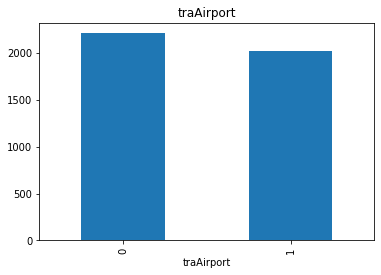

In [ ]:
#This will check the importance of missing values
for feature in features_with_na:
    data = dataset.copy()
    
    data[feature] = np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['price'].mean().plot.bar()
    plt.title(feature)
    plt.show()

# Data description

In [ ]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']   
print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  4


,ID,price,rate,dateDifference
0,14393,1860,1.00,1
1,14409,1640,0.31,1
2,14415,5360,1.00,1
3,14429,1635,0.29,1
4,14431,1640,0.29,1


In [ ]:
dataset.describe()

,ID,price,rate,dateDifference
count,5.689170e+05,568917.000000,568917.000000,568917.000000
mean,3.709192e+07,2203.161693,0.768114,6.586815
std,2.292971e+07,1747.347610,0.250103,7.407127
min,3.149000e+03,235.000000,0.000000,-1.000000
25%,1.747548e+07,1010.000000,0.530000,2.000000
50%,3.573651e+07,1490.000000,0.860000,5.000000
75%,5.574632e+07,2980.000000,1.000000,7.000000
max,8.016500e+07,6410.000000,1.000000,30.000000


# Adding some columns of interest

In [ ]:
# Adding a columne named journey,for depAirport 'PEK' we are treating as onward journey and putting 0 in the column value,
#for depAirport 'SHA' we are treating as return journey and putting 1 in the column value.
dataset['journey'] = np.where(dataset['depAirport']=='PEK',0,1)

In [ ]:
#Adding a column named indirectFlight, if it is a direct flight then putting 0 in the column value else 1.
dataset['indirectFlight'] = np.where(dataset['traAirport']=='LYA',1,0)

In [ ]:
#extracting departure year,month,date,day,hour from departureDate
dataset['depYear'] = pd.DatetimeIndex(dataset['departureDate']).year
dataset['depMonth'] = pd.DatetimeIndex(dataset['departureDate']).month
dataset['depDate'] = pd.DatetimeIndex(dataset['departureDate']).day
dataset['depDay'] = pd.DatetimeIndex(dataset['departureDate']).dayofweek
dataset['depHour'] = pd.DatetimeIndex(dataset['departureDate']).hour

In [ ]:
#extracting create year,month,date,day,hour from createDate
dataset['creYear'] = pd.DatetimeIndex(dataset['createDate']).year
dataset['creMonth'] = pd.DatetimeIndex(dataset['createDate']).month
dataset['creDate'] = pd.DatetimeIndex(dataset['createDate']).day
dataset['creDay'] = pd.DatetimeIndex(dataset['createDate']).dayofweek
dataset['creHour'] = pd.DatetimeIndex(dataset['createDate']).hour

In [ ]:
#converting object type into datetime type
dataset['departureDate'] = pd.to_datetime(dataset['departureDate'])
dataset['arrivalDate'] = pd.to_datetime(dataset['arrivalDate'])
dataset['createDate'] = pd.to_datetime(dataset['createDate'])

In [ ]:
#Adding a column named flightDuration which is the difference between departure and arrival
dataset['flightDuration']= (dataset['arrivalDate']-dataset['departureDate']).astype('timedelta64[m]')

# Dropping rows with invalid value

In [ ]:
#removing rows if it has booking after departure
dataset =  dataset[((dataset['departureDate']-dataset['createDate'])/np.timedelta64(1,'s'))>0]
dataset.shape

(568742, 27)

In [ ]:
dataset_validRowValues = dataset[dataset.dateDifference >=0]

In [ ]:
dataset.price.mean()

2203.121142802888

In [ ]:
dataset_validRowValues.price.mean()

2203.121142802888

In [ ]:
dataset = dataset_validRowValues

In [ ]:
dataset.shape

(568742, 27)

In [ ]:
dataset.head()

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference,journey,indirectFlight,depYear,depMonth,depDate,depDay,depHour,creYear,creMonth,creDate,creDay,creHour,flightDuration
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1,0,0,2019,1,4,4,6,2019,1,3,3,14,140.0
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1,0,0,2019,1,4,4,7,2019,1,3,3,14,135.0
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1,0,0,2019,1,4,4,7,2019,1,3,3,14,135.0
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1,0,0,2019,1,4,4,7,2019,1,3,3,14,135.0
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1,0,0,2019,1,4,4,7,2019,1,3,3,14,135.0


# Dropping some unnecessary columns

In [ ]:
dataset = dataset.drop(['ID','depAirport','traAirport','arrAirport','departureDate','arrivalDate','createDate','depYear','creYear'],axis = 1)

In [ ]:
dataset.head()

,flightNumber,craftTypeCode,cabinClass,priceClass,price,rate,dateDifference,journey,indirectFlight,depMonth,depDate,depDay,depHour,creMonth,creDate,creDay,creHour,flightDuration
0,HO1252,320,C,C,1860,1.00,1,0,0,1,4,4,6,1,3,3,14,140.0
1,MU5138,33L,C,I,1640,0.31,1,0,0,1,4,4,7,1,3,3,14,135.0
2,MU5138,33L,C,J,5360,1.00,1,0,0,1,4,4,7,1,3,3,14,135.0
3,HU7605,350,C,I,1635,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0
4,HU7605,350,C,I,1640,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0


# Adding an attribute named airline

In [ ]:
dataset['airline'] = dataset['flightNumber'].astype(str).str[0:2]

In [ ]:
dataset.head()

,flightNumber,craftTypeCode,cabinClass,priceClass,price,rate,dateDifference,journey,indirectFlight,depMonth,depDate,depDay,depHour,creMonth,creDate,creDay,creHour,flightDuration,airline
0,HO1252,320,C,C,1860,1.00,1,0,0,1,4,4,6,1,3,3,14,140.0,HO
1,MU5138,33L,C,I,1640,0.31,1,0,0,1,4,4,7,1,3,3,14,135.0,MU
2,MU5138,33L,C,J,5360,1.00,1,0,0,1,4,4,7,1,3,3,14,135.0,MU
3,HU7605,350,C,I,1635,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU
4,HU7605,350,C,I,1640,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU


In [ ]:
dataset.airline.unique()

array(['HO', 'MU', 'HU', 'CA', 'CZ', 'FM', 'MF'], dtype=object)

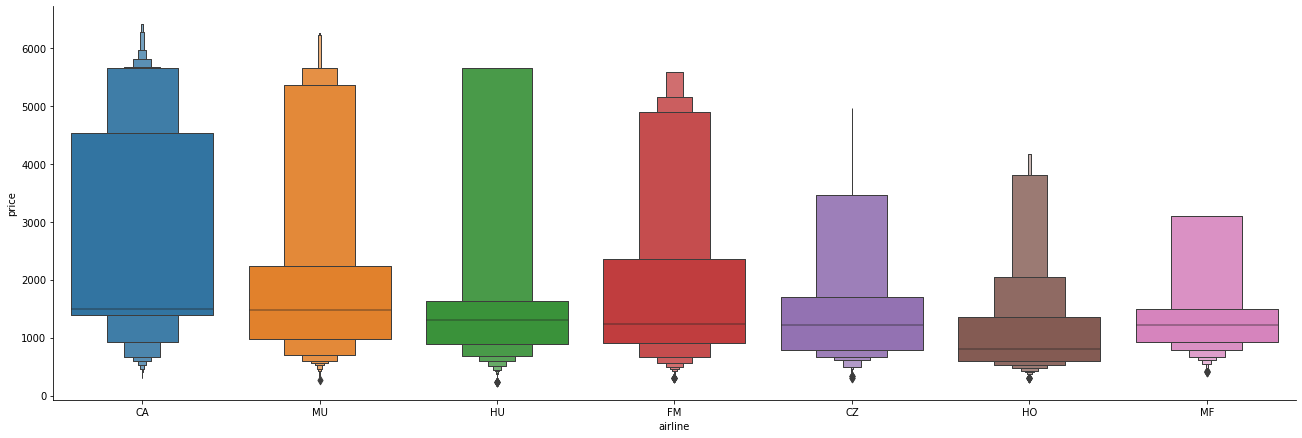

In [ ]:
sns.catplot(y = "price", x = "airline", data = dataset.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Creating dummies for airline attribute

In [ ]:
# As airline is Nominal Categorical data we will perform OneHotEncoding
airline = dataset[["airline"]]
airline = pd.get_dummies(airline, drop_first= True)

In [ ]:
airline.head()

,airline_CZ,airline_FM,airline_HO,airline_HU,airline_MF,airline_MU
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,1,0,0


# Label encoding for cabinClass

In [ ]:
dataset["cabinClass"].value_counts()

Y    367129
C    139272
F     62341
Name: cabinClass, dtype: int64

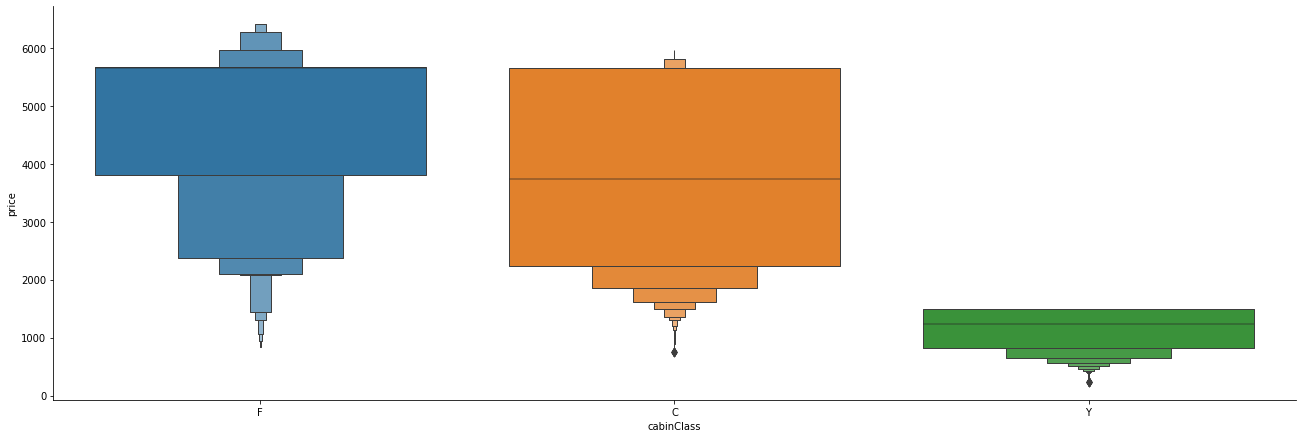

In [ ]:
sns.catplot(y = "price", x = "cabinClass", data = dataset.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# As cabinClass  is Ordinal Categorical data we will perform LabelEncoding
dataset['cabinClass'] = np.where(dataset['cabinClass']=='F',3,np.where(dataset['cabinClass']=='C',2,1))

In [ ]:
dataset.head()

,flightNumber,craftTypeCode,cabinClass,priceClass,price,rate,dateDifference,journey,indirectFlight,depMonth,depDate,depDay,depHour,creMonth,creDate,creDay,creHour,flightDuration,airline
0,HO1252,320,2,C,1860,1.00,1,0,0,1,4,4,6,1,3,3,14,140.0,HO
1,MU5138,33L,2,I,1640,0.31,1,0,0,1,4,4,7,1,3,3,14,135.0,MU
2,MU5138,33L,2,J,5360,1.00,1,0,0,1,4,4,7,1,3,3,14,135.0,MU
3,HU7605,350,2,I,1635,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU
4,HU7605,350,2,I,1640,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU


# Creating priceCategory in place of  priceClass attribute

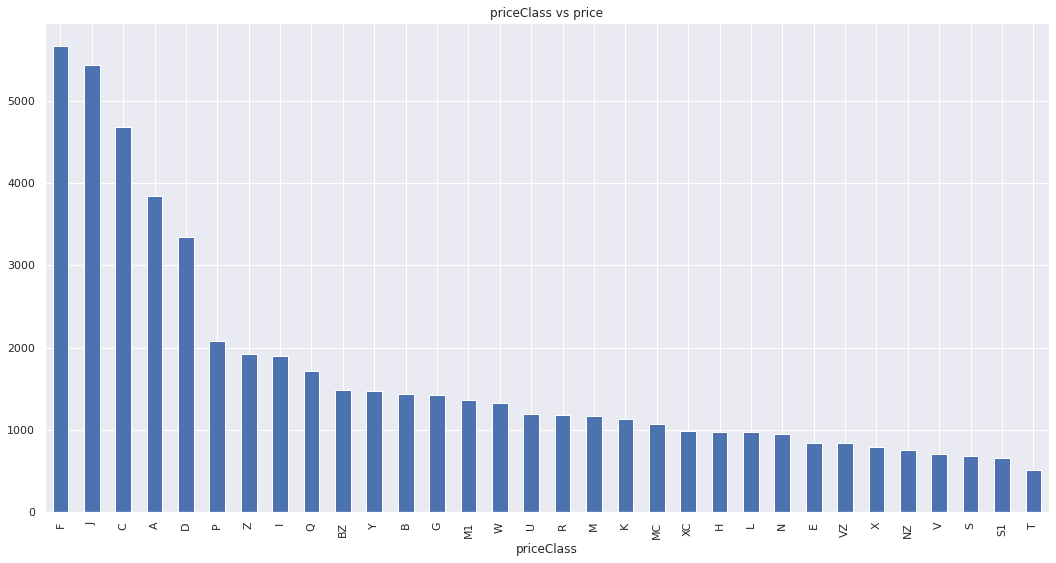

In [ ]:
data = dataset.copy()
fig= plt.figure(figsize=(18,9))
sns.set()
data.groupby('priceClass')['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('priceClass vs price')
plt.show()

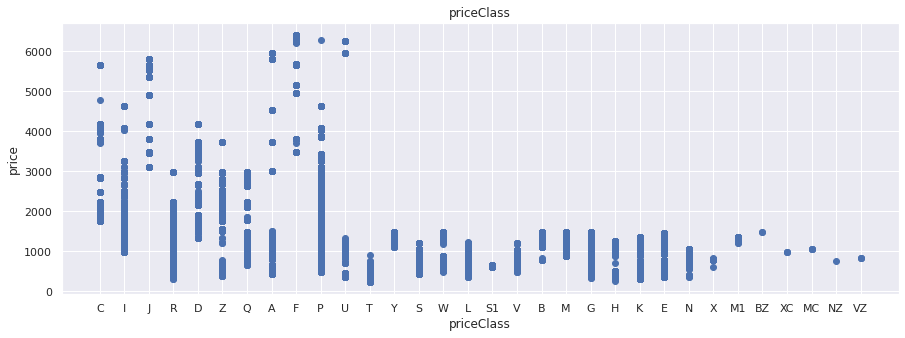

In [ ]:
fig= plt.figure(figsize=(15,5))
data=dataset.copy()
plt.scatter(data['priceClass'],data['price'])
plt.xlabel('priceClass')
plt.ylabel('price')
plt.title('priceClass')
plt.show()

In [ ]:
dataset["priceClass"].value_counts()

Y     68127
J     58181
B     54632
W     36892
R     33361
F     33175
V     25728
I     25241
Q     24992
P     22496
K     20780
N     18789
S     17197
C     16355
A     16141
L     15098
G     14379
Z     14279
T     11177
D     10617
U      7587
M      6423
S1     5427
H      4865
E      3254
X      1886
M1     1650
MC        4
XC        3
VZ        3
BZ        2
NZ        1
Name: priceClass, dtype: int64

In [ ]:
dataset['priceCategory']= dataset['priceClass']

In [ ]:
dataset.head()

,flightNumber,craftTypeCode,cabinClass,priceClass,price,rate,dateDifference,journey,indirectFlight,depMonth,depDate,depDay,depHour,creMonth,creDate,creDay,creHour,flightDuration,airline,priceCategory
0,HO1252,320,2,C,1860,1.00,1,0,0,1,4,4,6,1,3,3,14,140.0,HO,C
1,MU5138,33L,2,I,1640,0.31,1,0,0,1,4,4,7,1,3,3,14,135.0,MU,I
2,MU5138,33L,2,J,5360,1.00,1,0,0,1,4,4,7,1,3,3,14,135.0,MU,J
3,HU7605,350,2,I,1635,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU,I
4,HU7605,350,2,I,1640,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU,I


In [ ]:
dataset["priceCategory"].replace({"Y": "cat1","B": "cat1","W": "cat1","V": "cat1","K": "cat1","N": "cat1","S": "cat1","L": "cat1","G": "cat1","T": "cat1","U": "cat1","M": "cat1","H": "cat1","E": "cat1","I": "cat2","Q": "cat2","P": "cat2","Z": "cat2","A": "cat2","R": "cat3","D": "cat3","C": "cat3","J": "cat4","F": "cat4","S1": "cat5","X": "cat5","M1": "cat5","MC": "cat5","XC": "cat5","BZ": "cat5","NZ": "cat5","VZ": "cat5"}, inplace=True)

In [ ]:
dataset.head()

,flightNumber,craftTypeCode,cabinClass,priceClass,price,rate,dateDifference,journey,indirectFlight,depMonth,depDate,depDay,depHour,creMonth,creDate,creDay,creHour,flightDuration,airline,priceCategory
0,HO1252,320,2,C,1860,1.00,1,0,0,1,4,4,6,1,3,3,14,140.0,HO,cat3
1,MU5138,33L,2,I,1640,0.31,1,0,0,1,4,4,7,1,3,3,14,135.0,MU,cat2
2,MU5138,33L,2,J,5360,1.00,1,0,0,1,4,4,7,1,3,3,14,135.0,MU,cat4
3,HU7605,350,2,I,1635,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU,cat2
4,HU7605,350,2,I,1640,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU,cat2


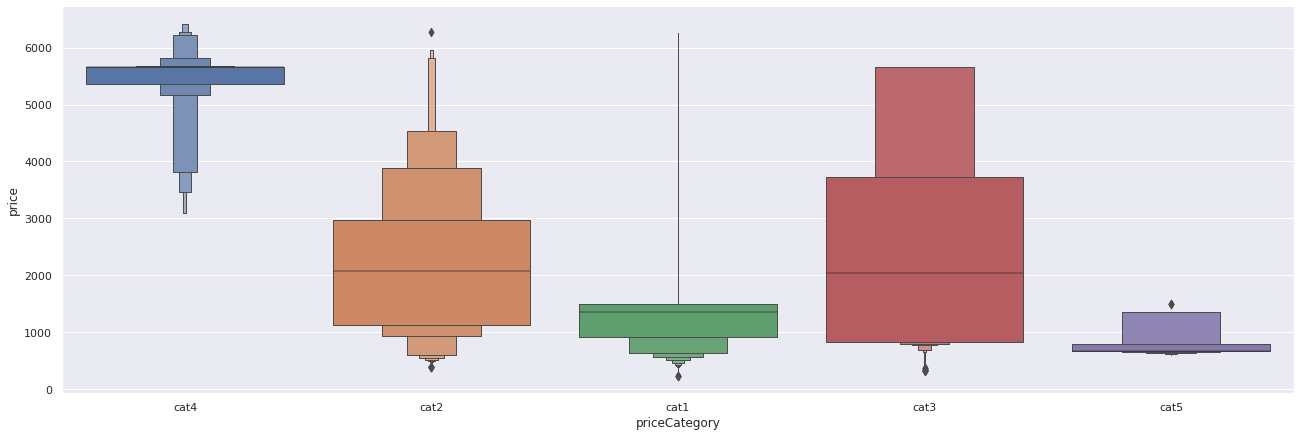

In [ ]:
sns.catplot(y = "price", x = "priceCategory", data = dataset.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Creating dummies for priceCategory attribute

In [ ]:
# As priceCategory is Nominal Categorical data we will perform OneHotEncoding
priceCategory = dataset[["priceCategory"]]
priceCategory = pd.get_dummies(priceCategory, drop_first= True)

In [ ]:
priceCategory

,priceCategory_cat2,priceCategory_cat3,priceCategory_cat4,priceCategory_cat5
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
568912,0,1,0,0
568913,0,1,0,0
568914,0,1,0,0
568915,0,1,0,0


# Plotting carftTypeCode vs price

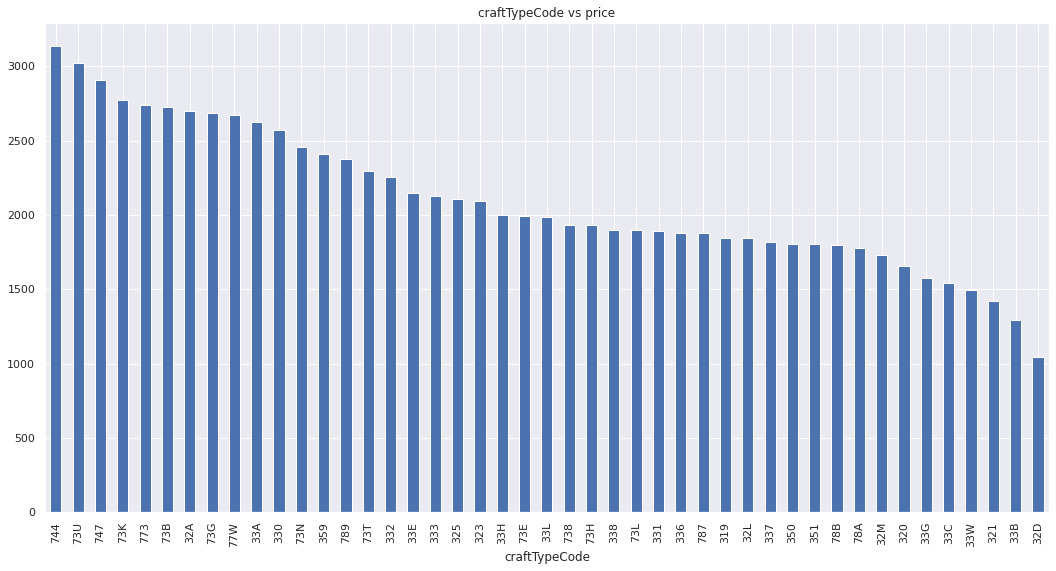

In [ ]:
data = dataset.copy()
fig= plt.figure(figsize=(18,9))
sns.set()
data.groupby('craftTypeCode')['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('craftTypeCode vs price')
plt.show()

In [ ]:
dataset["craftTypeCode"].value_counts()

33L    111631
359     70634
333     58714
773     52681
325     31453
738     25871
321     22104
33A     17706
789     15299
73E     14815
73L     14487
32L     14182
747     14156
73K     11470
32A     10288
77W      9710
330      7498
350      7220
323      6295
338      5525
78A      5409
331      5400
33E      4980
744      4474
33G      3780
337      3126
33H      3026
320      2360
787      2212
78B      1893
332      1762
351      1611
73N      1530
33W      1091
336       920
319       695
73T       620
32M       582
73B       577
33C       469
73H       368
33B        92
73U        15
73G         7
32D         4
Name: craftTypeCode, dtype: int64

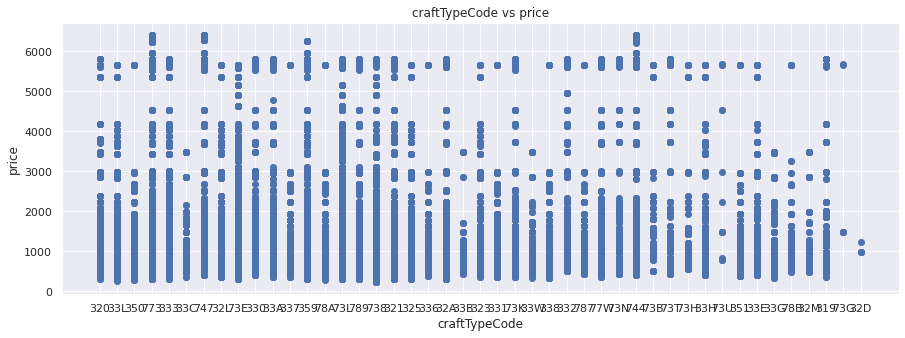

In [ ]:
fig= plt.figure(figsize=(15,5))
data=dataset.copy()
plt.scatter(data['craftTypeCode'],data['price'])
plt.xlabel('craftTypeCode')
plt.ylabel('price')
plt.title('craftTypeCode vs price')
plt.show()

# Dropping some more attributes

In [ ]:
dataset1 = dataset.drop(['flightNumber', 'craftTypeCode', 'priceClass'],axis = 1)

In [ ]:
dataset1.head()

,cabinClass,price,rate,dateDifference,journey,indirectFlight,depMonth,depDate,depDay,depHour,creMonth,creDate,creDay,creHour,flightDuration,airline,priceCategory
0,2,1860,1.00,1,0,0,1,4,4,6,1,3,3,14,140.0,HO,cat3
1,2,1640,0.31,1,0,0,1,4,4,7,1,3,3,14,135.0,MU,cat2
2,2,5360,1.00,1,0,0,1,4,4,7,1,3,3,14,135.0,MU,cat4
3,2,1635,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU,cat2
4,2,1640,0.29,1,0,0,1,4,4,7,1,3,3,14,135.0,HU,cat2


In [ ]:
dataset1.shape

(568742, 17)

# Plotting continuous_features

In [ ]:
continuous_features = ['rate', 'flightDuration', 'price']

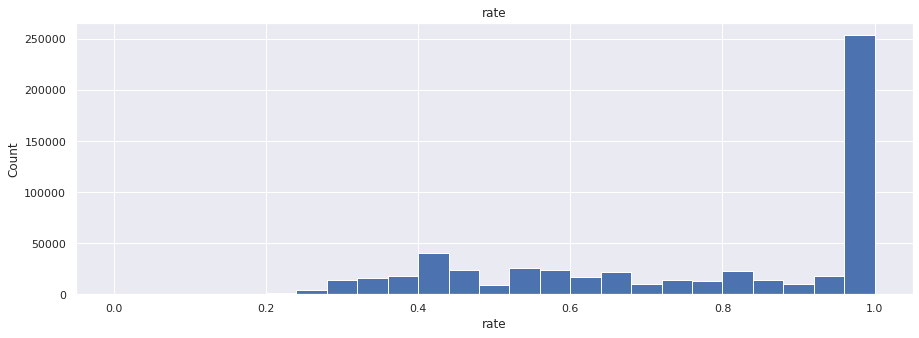

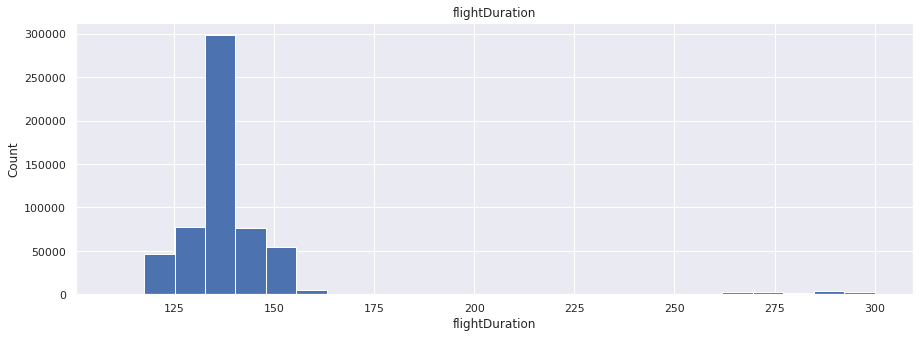

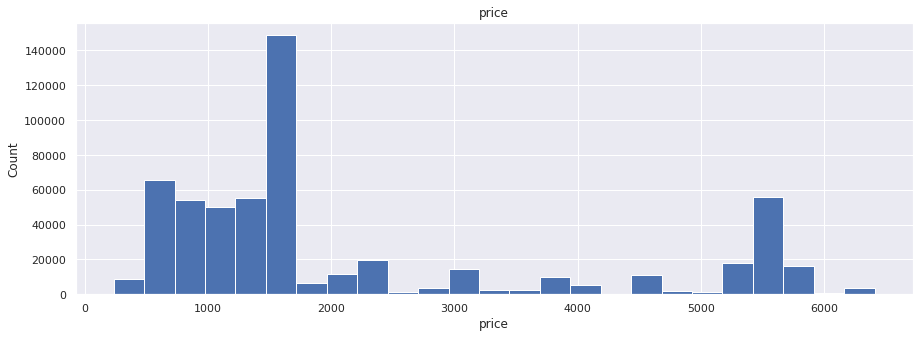

In [ ]:
for feature in continuous_features:
    fig= plt.figure(figsize=(15,5))
    data=dataset1.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

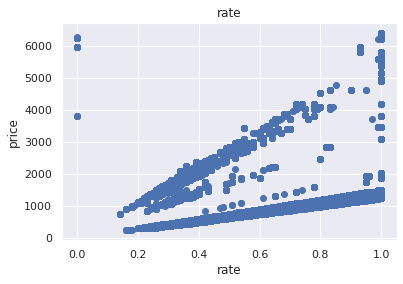

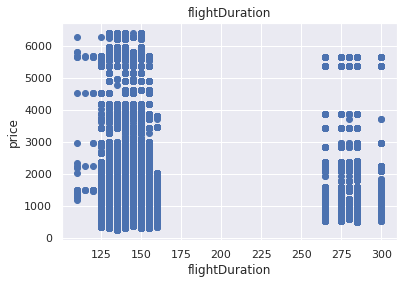

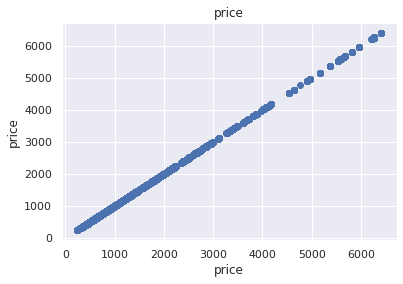

In [ ]:
for feature in continuous_features:
    data=dataset1.copy()
    plt.scatter(data[feature],data['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

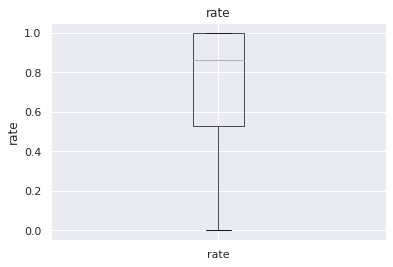

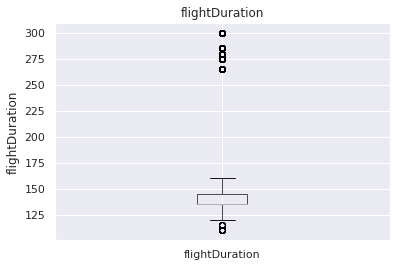

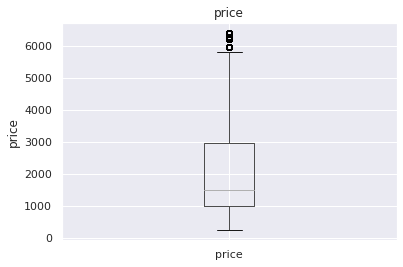

In [ ]:
for feature in continuous_features:
    data=dataset1.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
out_features=['flightDuration']

# Removing Outliers

In [ ]:
Q1 = dataset1[out_features].quantile(0.25)
Q3 = dataset1[out_features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

flightDuration    10.0
dtype: float64


In [ ]:
dataset1 = dataset1[~((dataset1[out_features] < (Q1 - 1.5 * IQR)) |(dataset1[out_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
dataset1.shape

(556645, 17)

# Plotting barplot for mean of price grouped by discrete_features

In [ ]:
discrete_features = ['journey','cabinClass','dateDifference','indirectFlight','depMonth','depDate', 'depDay', 'depHour','creMonth','creDate', 'creDay', 'creHour','airline','priceCategory']

In [ ]:
discrete_features

['journey',
 'cabinClass',
 'dateDifference',
 'indirectFlight',
 'depMonth',
 'depDate',
 'depDay',
 'depHour',
 'creMonth',
 'creDate',
 'creDay',
 'creHour',
 'airline',
 'priceCategory']

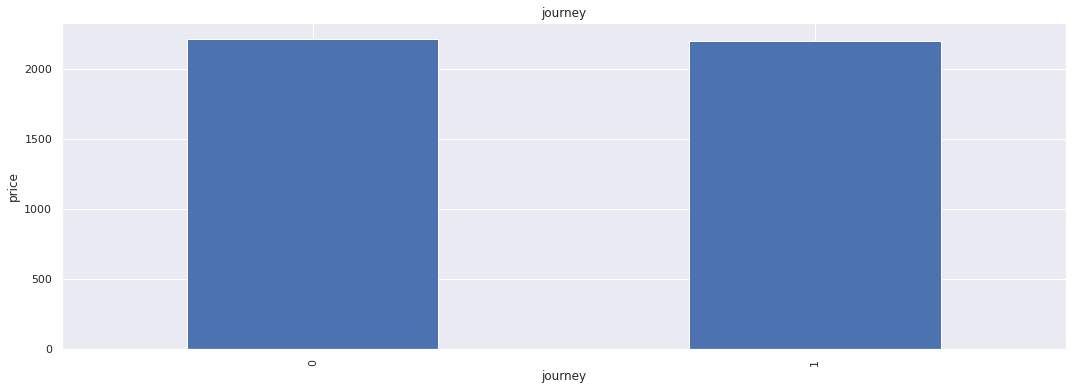

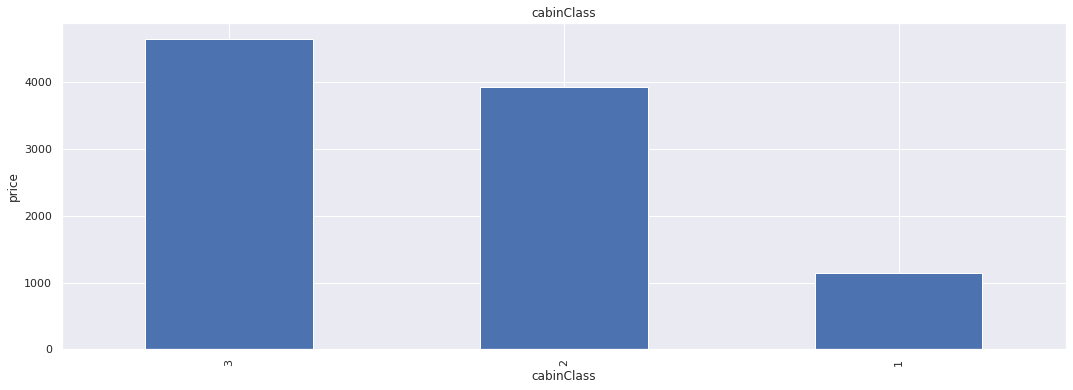

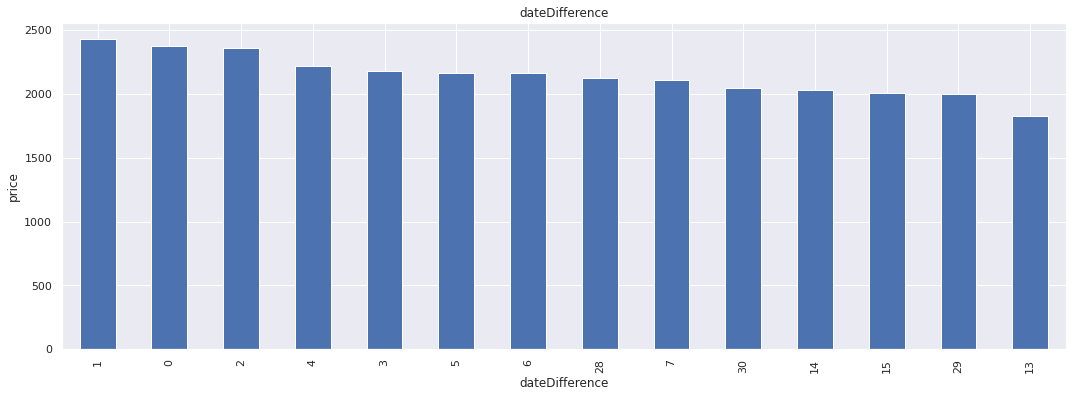

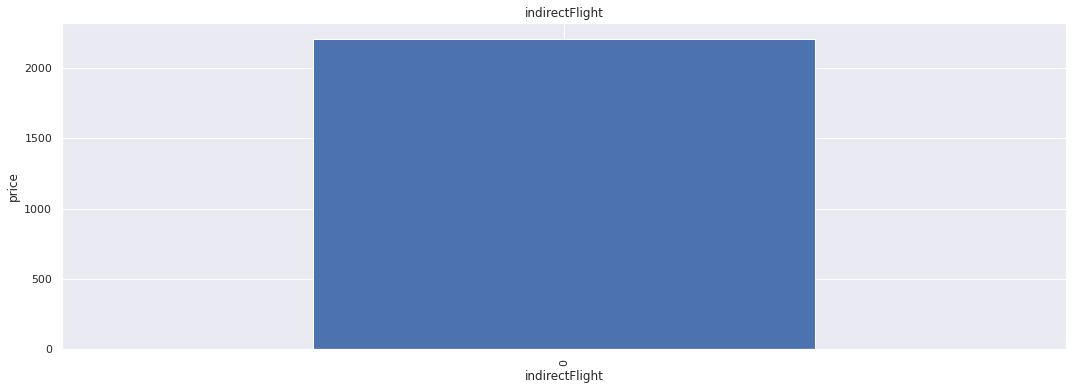

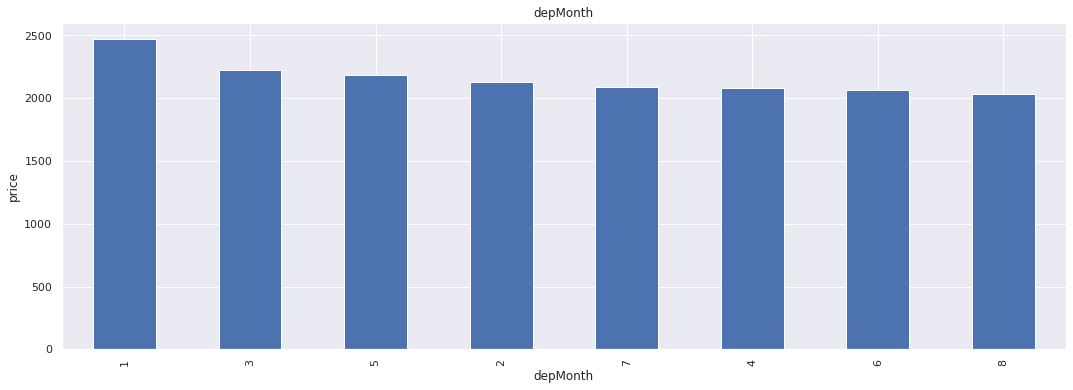

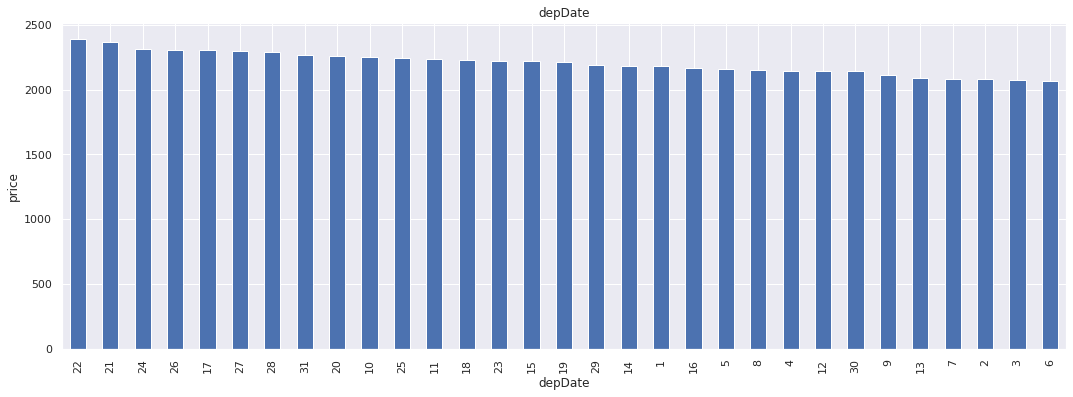

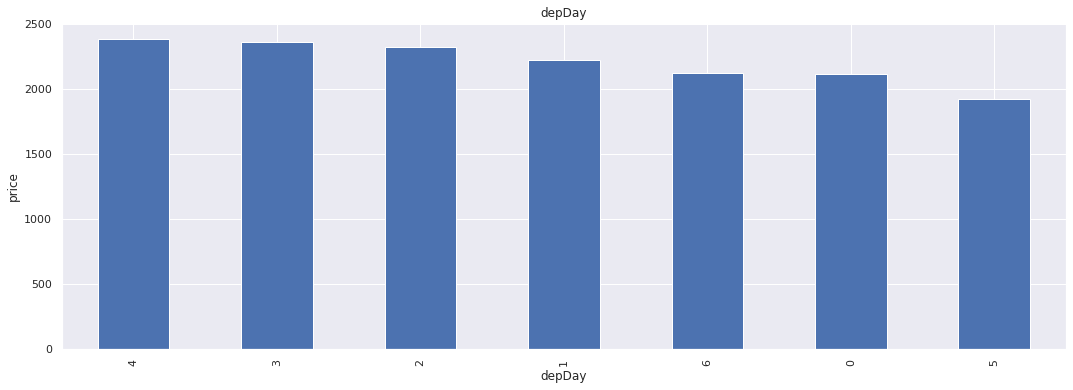

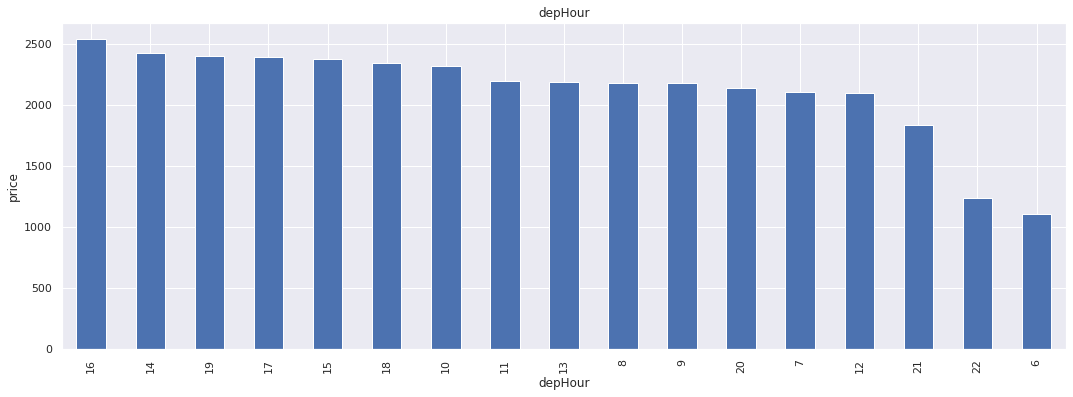

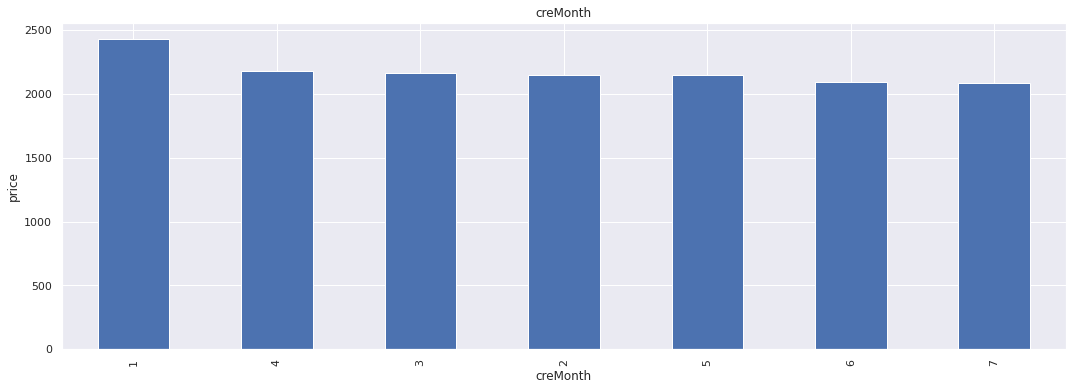

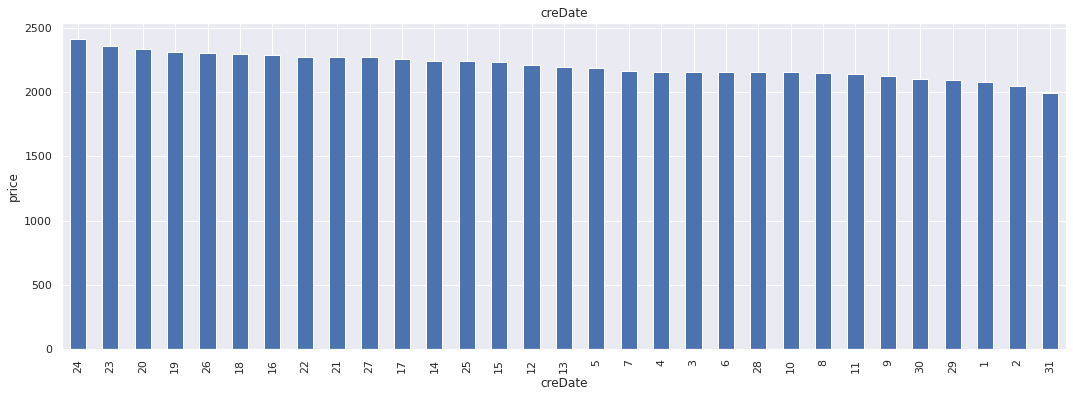

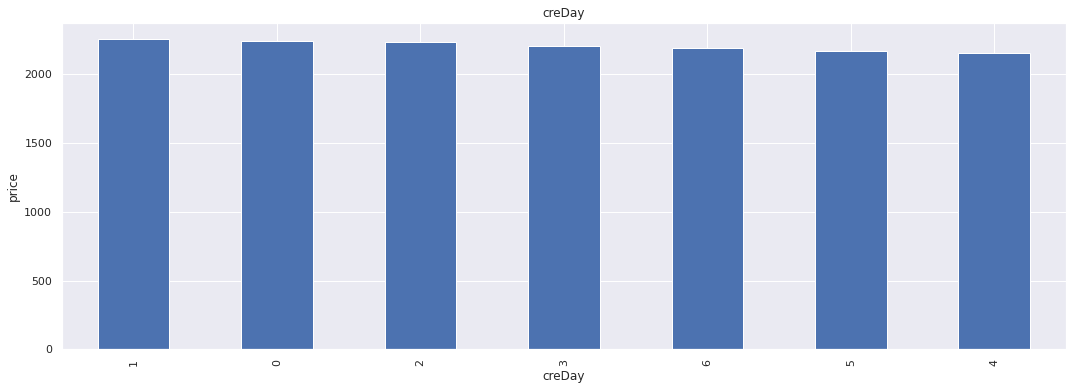

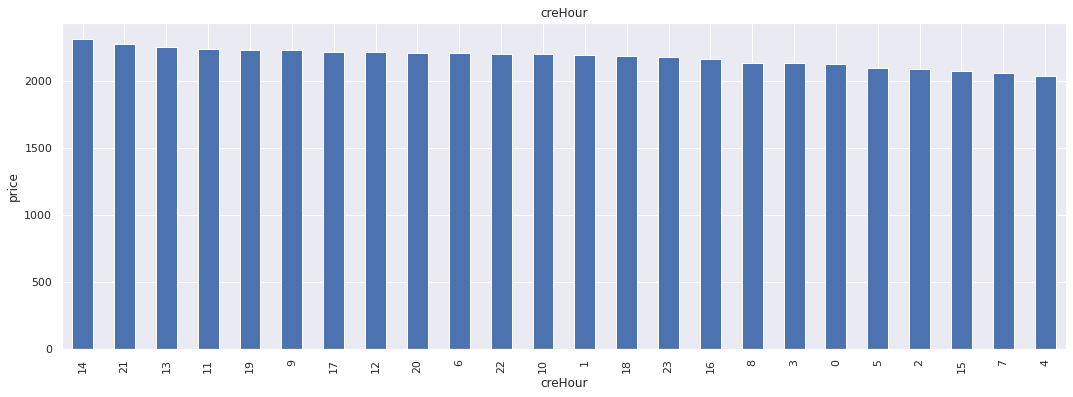

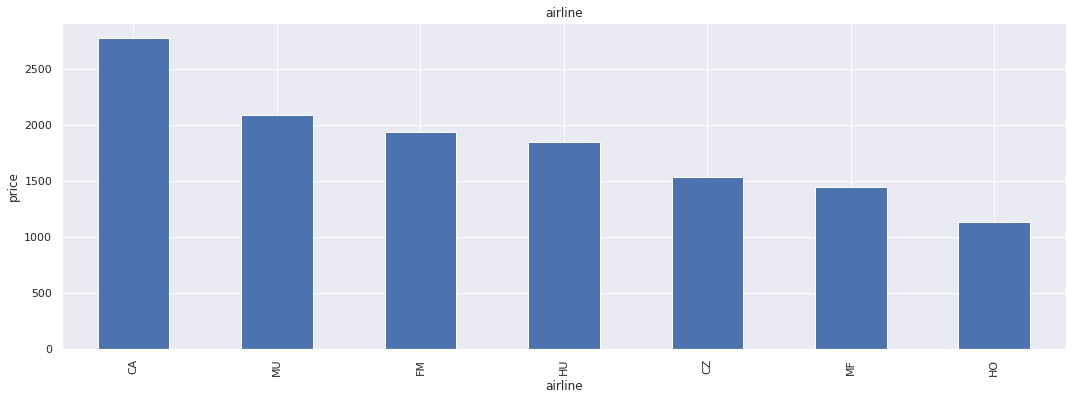

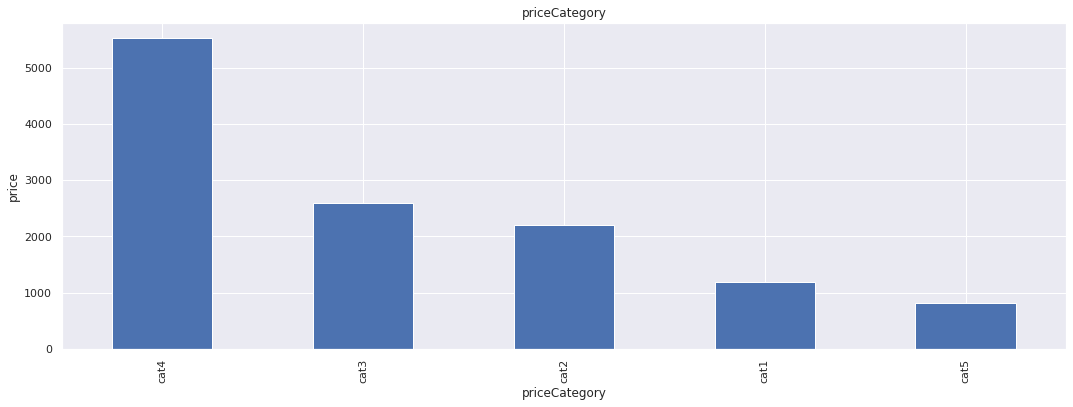

In [ ]:
for feature in discrete_features:
    fig= plt.figure(figsize=(18,6))
    sns.set()
    data = dataset1.copy()
    data.groupby(feature)['price'].mean().sort_values(ascending = False).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

# Dropping more attributes

In [ ]:
dataset2 = dataset1.drop(['journey', 'depDate', 'creDay','indirectFlight','flightDuration'],axis = 1)

In [ ]:
dataset2.shape

(556645, 12)

In [ ]:
dataset2.head()

,cabinClass,price,rate,dateDifference,depMonth,depDay,depHour,creMonth,creDate,creHour,airline,priceCategory
0,2,1860,1.00,1,1,4,6,1,3,14,HO,cat3
1,2,1640,0.31,1,1,4,7,1,3,14,MU,cat2
2,2,5360,1.00,1,1,4,7,1,3,14,MU,cat4
3,2,1635,0.29,1,1,4,7,1,3,14,HU,cat2
4,2,1640,0.29,1,1,4,7,1,3,14,HU,cat2


# Correlation Heatmap

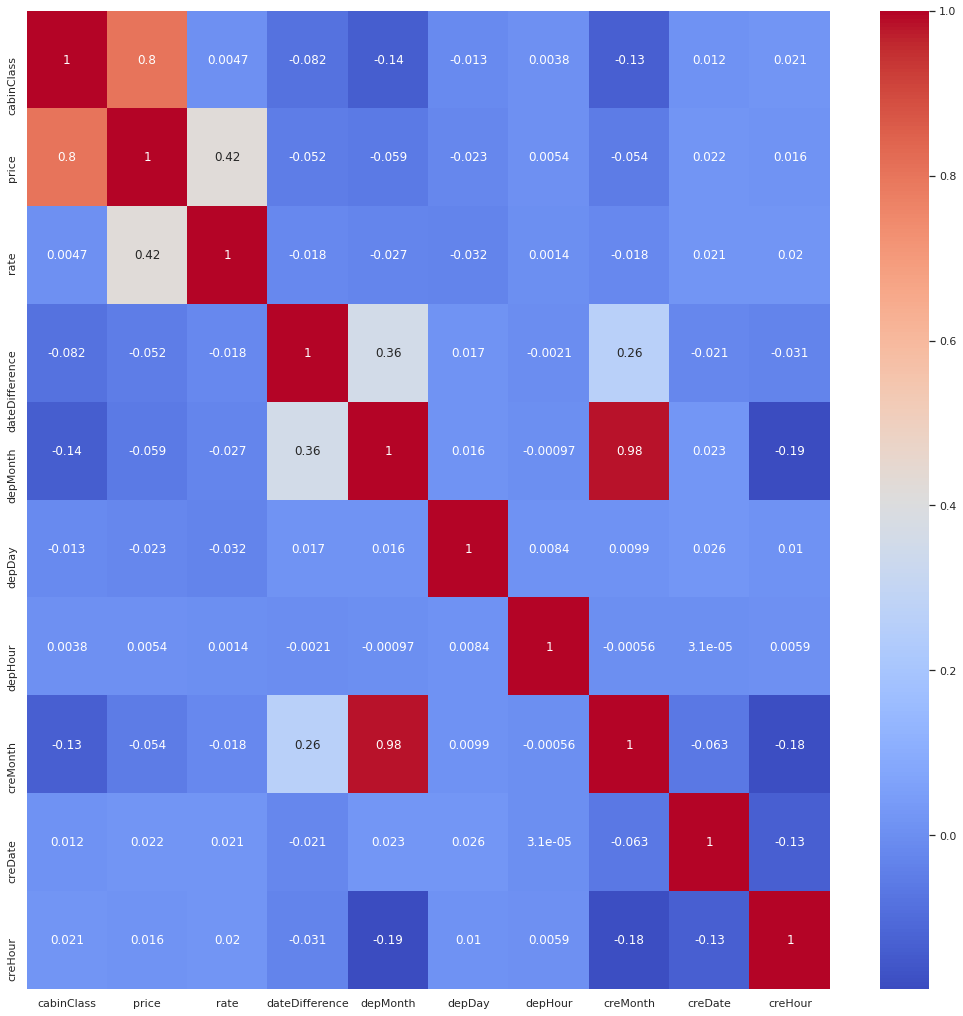

In [ ]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(dataset2.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
# Concatenate dataframe
dataframe = pd.concat([dataset2, airline, priceCategory], axis = 1)

In [ ]:
dataframe1 = dataframe.drop(['airline','priceCategory'],axis = 1)

In [ ]:
dataframe1.head()
dataframe1.tail(10)
pd.DataFrame.drop_duplicates(dataframe1)
dataframe1.tail(30)

,cabinClass,price,rate,dateDifference,depMonth,depDay,depHour,creMonth,creDate,creHour,airline_CZ,airline_FM,airline_HO,airline_HU,airline_MF,airline_MU,priceCategory_cat2,priceCategory_cat3,priceCategory_cat4,priceCategory_cat5
568880,1.0,670.0,0.45,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,0,0,0,0,1,0,0,0,0
568881,1.0,670.0,0.45,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,0,0,0,0,1,0,0,0,0
568882,1.0,720.0,0.49,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,0,0,0,0,1,0,0,0,0
568883,1.0,760.0,0.52,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,0,0,0,0,1,0,0,0,0
568884,1.0,640.0,0.43,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,0,0,0,0,1,0,0,0,0
568885,1.0,1490.0,1.00,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,0,0,0,0,1,0,0,0,0
568886,1.0,670.0,0.50,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,1,0,0,0,0,0,0,0,0
568887,1.0,670.0,0.50,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,1,0,0,0,0,0,0,0,0
568888,1.0,670.0,0.50,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,1,0,0,0,0,0,0,0,0
568889,1.0,720.0,0.53,7.0,7.0,6.0,21.0,7.0,14.0,23.0,0,1,0,0,0,0,0,0,0,0


In [ ]:
dataframe1.shape

(556645, 20)

In [ ]:
dataframe2 = dataframe1.drop(['creHour','creDate','depDay'],axis =1)

In [ ]:
dataframe2.head()

,cabinClass,price,rate,dateDifference,depMonth,depHour,creMonth,airline_CZ,airline_FM,airline_HO,airline_HU,airline_MF,airline_MU,priceCategory_cat2,priceCategory_cat3,priceCategory_cat4,priceCategory_cat5
0,2.0,1860.0,1.00,1.0,1.0,6.0,1.0,0,0,1,0,0,0,0,1,0,0
1,2.0,1640.0,0.31,1.0,1.0,7.0,1.0,0,0,0,0,0,1,1,0,0,0
2,2.0,5360.0,1.00,1.0,1.0,7.0,1.0,0,0,0,0,0,1,0,0,1,0
3,2.0,1635.0,0.29,1.0,1.0,7.0,1.0,0,0,0,1,0,0,1,0,0,0
4,2.0,1640.0,0.29,1.0,1.0,7.0,1.0,0,0,0,1,0,0,1,0,0,0


In [ ]:
dataframe2.shape
dataframe2.tail(10)
pd.DataFrame.drop_duplicates(dataframe2)


,cabinClass,price,rate,dateDifference,depMonth,depHour,creMonth,airline_CZ,airline_FM,airline_HO,airline_HU,airline_MF,airline_MU,priceCategory_cat2,priceCategory_cat3,priceCategory_cat4,priceCategory_cat5
0,2.0,1860.0,1.00,1.0,1.0,6.0,1.0,0,0,1,0,0,0,0,1,0,0
1,2.0,1640.0,0.31,1.0,1.0,7.0,1.0,0,0,0,0,0,1,1,0,0,0
2,2.0,5360.0,1.00,1.0,1.0,7.0,1.0,0,0,0,0,0,1,0,0,1,0
3,2.0,1635.0,0.29,1.0,1.0,7.0,1.0,0,0,0,1,0,0,1,0,0,0
4,2.0,1640.0,0.29,1.0,1.0,7.0,1.0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568903,1.0,1065.0,0.72,7.0,7.0,21.0,7.0,0,0,1,0,0,0,1,0,0,0
568905,1.0,1190.0,0.80,7.0,7.0,21.0,7.0,0,0,1,0,0,0,1,0,0,0
568906,1.0,1042.0,0.70,7.0,7.0,21.0,7.0,0,0,1,0,0,0,1,0,0,0
568907,1.0,1050.0,0.71,7.0,7.0,21.0,7.0,0,0,1,0,0,0,1,0,0,0


In [ ]:
feature_list =dataframe2.drop(['price'], axis = 1).columns

**Splitting the DataSet into X and y sets of** **Attributes**

In [ ]:
X=dataframe2.drop(['price'], axis = 1).iloc[:,0:].values
print(X)
y=dataframe2.iloc[:,1].values
print(y)

[[2.   1.   1.   ... 1.   0.   0.  ]
 [2.   0.31 1.   ... 0.   0.   0.  ]
 [2.   1.   1.   ... 0.   1.   0.  ]
 ...
 [1.   0.71 7.   ... 0.   0.   0.  ]
 [1.   0.74 7.   ... 0.   0.   0.  ]
 [1.   1.   7.   ... 0.   0.   0.  ]]
[1860. 1640. 5360. ... 1050. 1090. 1490.]


**Split Data into Training And Testing Sets**

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (389651, 16)
Training Labels Shape: (389651,)
Testing Features Shape: (166994, 16)
Testing Labels Shape: (166994,)


Just to recap, to get the data into a form acceptable for machine learning we:
1. One-hot encoded categorical variables
2. Split data into features and labels
3. Converted to arrays
4. Split data into training and testing sets

**Importing And Training The Model**

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

**Forest's Predict Method on the Test Data**

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.19 degrees.


**Calculating The Accuracy of the Model**

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.92 %.


**Visualising The Decision Tree**

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

**Limit The Depth of The Tree**

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

**Numerical Feature Importance**

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

**Plotting Graph Between Variable And Numerical Importance**

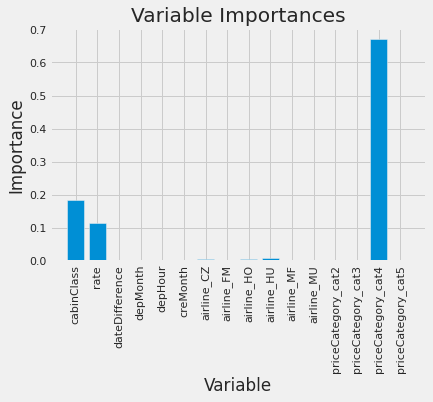

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**New Random Forest with Only Feature Importance Variable**

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.get_loc('cabinClass'), feature_list.get_loc('rate'),feature_list.get_loc('priceCategory_cat4')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

**Performance Matrix Of The Model**

In [ ]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
y_pred = rf.predict(test_features)

print(rf.score(train_features,train_labels))

print(rf.score(test_features,test_labels))
print(y_pred)

In [ ]:
#To show distribution
import sklearn.metrics as metrics
#To show scatter
plt.scatter(test_labels, y_pred, alpha = 0.5)
plt.xlabel("test_labels")
plt.ylabel("y_pred")
plt.show()
print('MAE:', metrics.mean_absolute_error(test_labels, y_pred))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred))

Conclusion:
1. We have removed outliers completely from our dataset but we also have a planning to replace the outliers with some specific value.
2. We have added as many attributes as we can to our dataset. We will choose a subset of this dataset for our modeling purpose depending upon our model requirement.
3. We have added dummy_variables by thinking its importance in some models, though we have not decided our model yet.
4. We have plotted heatmap after dropping several attributes to get better visualization.
5. We are assuming cabinClass as ordinal attribute so we encoded it as rank.
6. We have not taken a categorical attribute craftTypeCode in our analysis as we have not noticed anything interesting there.
7. As our continuous features are not showing normal distribution so we have not comfortably done any statistical significance tests yet.
8. We are using Random Forest Regressor as our Model.
9. The Traing and Testing of Data is done as 70:30 ratio.
10. The Accuracy of the Model came out be 99.92%.
11. Find the Numerical Importance of Features.
12.  Make a New Random Forest with Important Features.
13. Compare the Accuracy with this new Rndom Forest Model.